<a href="https://colab.research.google.com/github/youngmoo/ECES-434/blob/main/Class%203.2%20(2021-01-27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECES-434: Class 3.2 (2021-01-27)**
Continuing Week 3 of Applied DSP!

As always, start by importing the "usual" modules we'll be using...

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import IPython.display as ipd
%matplotlib inline
import librosa
from scipy import signal

from IPython.display import HTML

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')



In [44]:
# CHANGE THIS to your Drexel username!!
username = 'anonymous'

# Load 44.1 kHz audio clip
Yo Yo Ma: Bach Cello Suite No. 1

In [63]:
yy44,fs44 = librosa.load(  '003.wav',sr=None)
ipd.Audio(yy44,rate=fs44)

Text(0.5, 0, 'Time(sec)')

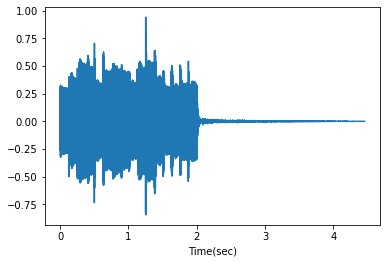

In [64]:
t = np.arange(len(yy44)) / fs44
plt.plot(t,yy44)
fig = plt.figure(1,1)
plt.xlabel('Time(sec)')

c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


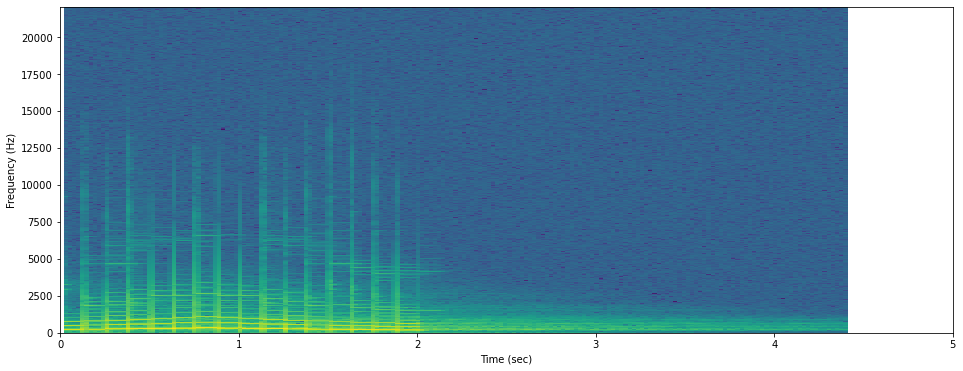

In [65]:
f1, t1, Sxx = signal.spectrogram(yy44, fs44, window='hann', nperseg=2048, noverlap=1024, nfft=4096)

fig = plt.figure(figsize=(16,6))

plt.pcolormesh(t1, f1, 20*np.log10(np.abs(Sxx)))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

plt.xlim(0,5)
#plt.ylim(0,2000)

plt.show()

## Load low sampling rate (11025 Hz) version of audio clip

In [66]:
yy11,fs11 = librosa.load(  '003.wav',sr=None)
ipd.Audio(yy11,rate=fs11)

## Let's create a custom plotSpectrogram function
Because we're going to be taking a lot of spectrograms...

c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


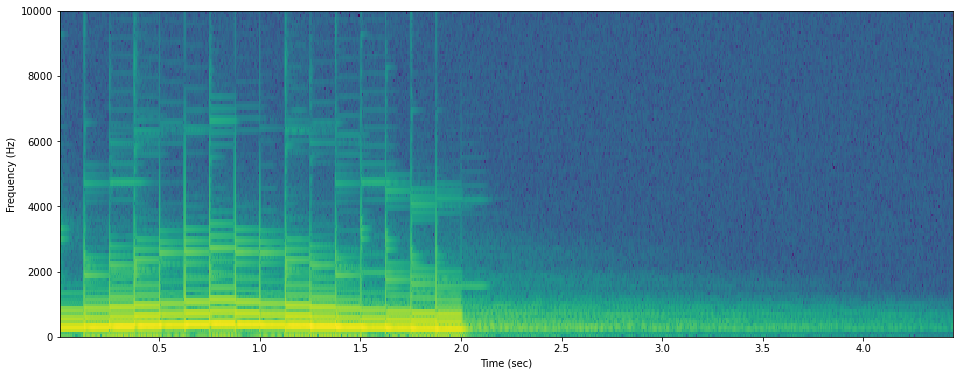

In [67]:
def plotSpectrogram(sig, fs, win='hann', nseg=512, olap=256, fft_len=512):
  f1, t1, Sxx = signal.spectrogram(sig, fs, window=win, nperseg=nseg, noverlap=olap, nfft=fft_len)

  fig = plt.figure(figsize=(16,6))

  plt.pcolormesh(t1, f1, 20*np.log10(np.abs(Sxx)))
  plt.ylabel('Frequency (Hz)')
  plt.xlabel('Time (sec)')
  return plt

plt1 = plotSpectrogram(yy11, fs11)
plt1.ylim(0,10000)
plt1.show()

#Sample rate conversion: sample and hold


In [68]:
yy11_44a = np.repeat(yy11,4)
ipd.Audio(yy11_44a,rate=44100)

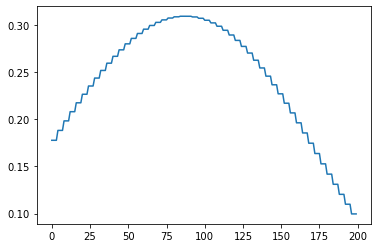

In [69]:
plt.plot(yy11_44a[5000:5200])

c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


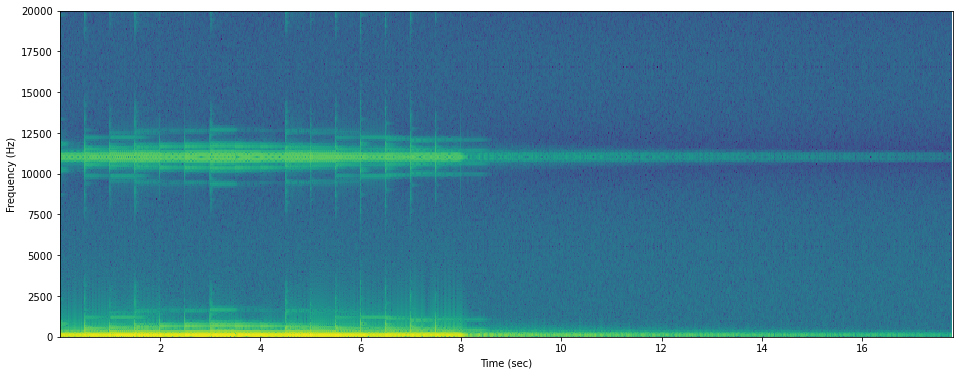

In [70]:
plt2 = plotSpectrogram(yy11_44a, fs44)
plt2.ylim(0,20000)
plt2.show()

## Custom animation functions
Again, because we'll be using these a lot...

In [71]:
n_o = 0
f_size = 2048
n_hop = f_size / 2
N_fft = 4096
f = np.arange(N_fft) * fs44 / N_fft

# First set up the figure, the axis, and the plot element we want to animate
def setup(x_lim=(0,20000), y_lim=(-120,100)):
  fig = plt.figure(figsize=(14,6))
  ax = plt.axes(xlim=x_lim,ylim=y_lim)
  plt.close()   # Don't output the final figure separately
  line, = ax.plot([], [])
  return fig, line

# initialization function: plot the background of each frame
def init():
    #line, = ax.plot([], [])
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i, sig):
    n1 = int(n_o + n_hop*i)
    n2 = int(n_o + n_hop*i + f_size)

    x_i = sig[n1:n2]
    X_i = np.fft.fft(x_i * np.hanning(len(x_i)), n=N_fft)
    X_mag = 20*np.log(np.abs(X_i))

    line.set_data(f, X_mag)
    return (line,)  

fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44a,), interval=1000/30, blit=True)
anim

#Interpolation = Smoothing

##Upsampling by inserting zeros

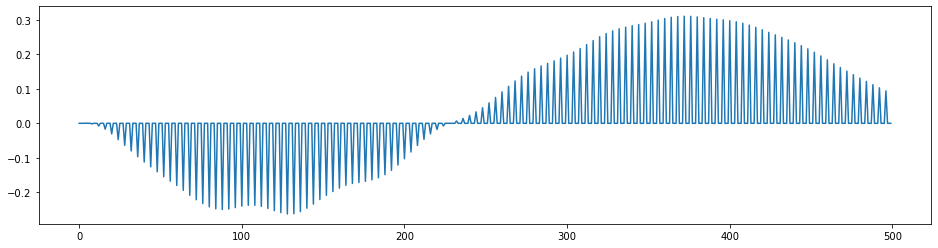

In [59]:
L = 4
yy11_44u = np.zeros( len(yy11)*L - (L-1) )
yy11_44u[::4] = yy11                # Put our 11 kHz wave every 4th sample

fig=plt.figure(figsize=(16,4))
plt.plot(yy11_44u[:500])
ipd.Audio(yy11_44u,rate=fs44)


c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
c:\Users\SherlocKk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


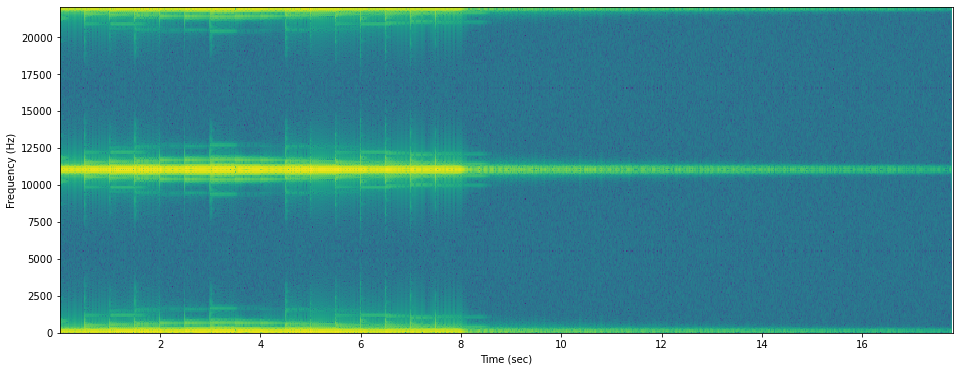

In [60]:
plt0 = plotSpectrogram(yy11_44u, fs44)
plt0.show()

In [61]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44u,), interval=1000/30, blit=True)
anim

## Linear interpolation
NumPy has an *interp* function... let's see what it does.

In [ ]:
t44 = np.arange(len(yy11)*L - (L-1)) / 44100
t11 = np.arange(len(yy11)) / fs11

In [ ]:
yy11_44b = np.interp(t44,t11,yy11)
ipd.Audio(yy11_44b,rate=44100)

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(yy11_44b[:200])

In [ ]:
plt2 = plotSpectrogram(yy11_44b, fs44)

In [ ]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44b,), interval=1000/30, blit=True)
anim

## Quadratic interpolation?
We need another module, *interpolate* from  SciPy (Scientific Python)


In [ ]:
from scipy import interpolate

In [ ]:
# How to use interpolate?
interpolate.interp1d()

yy11_44c = 
ipd.Audio(yy11_44c,rate=44100)

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(yy11_44c[:1000])

In [ ]:
plt4 = plotSpectrogram(yy11_44c, fs44)

In [ ]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44c,), interval=1000/30, blit=True)
anim

## Cubic interpolation?

In [ ]:
interpolate.interp1d()

yy11_44d = 

fig = plt.figure(figsize=(12,4))
plt.plot(yy11_44d[:1000])
ipd.Audio(yy11_44d,rate=44100)

In [ ]:
plt5 = plotSpectrogram(yy11_44d,fs44)

In [ ]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44d,), interval=1000/30, blit=True)
anim

##Moving average

In [ ]:
L = 17  # Number of samples to average

yy11_44e = np.zeros(len(yy11_44a))             # Create an output array of zeros

for n in range(len(yy11_44u)-L):
  yy11_44e[n] =                                # Compute moving average of L samples

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(yy11_44e[:500])
ipd.Audio(yy11_44e,rate=44100)

In [ ]:
plt6 = plotSpectrogram(yy11_44e, fs44)

In [ ]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44d,), interval=1000/30, blit=True)
anim

### What does the moving average do to frequency?
And what hapens if you change the number of samples you average?

In [ ]:
mv_avg = 
MA = 

fig = plt.figure(figsize=(16,4))
f = np.arange(512) * fs / 512
plt.plot(f,20*np.log10(np.abs(MA)))
plt.xlim(0,20000)

## Moving, weighted average

In [ ]:
L_w = 17

yy11_44f = np.zeros(len(yy11_44a))
h = np.hanning(L_w)

for n in range(len(yy11_44a)-L_w):
  yy11_44f[n] =                                 # Compute a weighted average using h


In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(yy11_44f[:500])
ipd.Audio(yy11_44f, rate=fs44)

In [ ]:
plt7 = plotSpectrogram(yy11_44f, fs44)

In [ ]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(yy11_44f,), interval=1000/30, blit=True)
anim

# What does the weighted moving average do to frequency?

In [ ]:
H = 

fig = plt.figure(figsize=(16,4))
f2 = np.arange(1024) * fs / 1024
plt.plot(f2,20*np.log10(np.abs(H)))
plt.xlim(0,15000)
plt.ylim(-40,40)

##*Running*, weighted average of all past samples

In [ ]:
x = yy11_44a # Start with our sample-and-hold signal
y = np.zeros(len(x))

run_sum = 0

for n in range(500):
  sum = 0
  for m in range(n):
    sum += 0.7**(n-m+1) * x[m]

  y[n] = 0.3*x[n] + sum

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(y[:500])

## There's gotta be a better way to do this...

In [ ]:
y2 = np.zeros(len(x))

for n in range(1,len(x)):
  y2[n] = 

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(y2[:500])
ipd.Audio(y2,rate=fs44)

In [ ]:
plotSpectrogram(y2,fs44)

## Can we take it further?

In [ ]:
y3 = np.zeros(len(x))

for n in range(2,len(x)):
  y3[n] = 

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(y3[:500])
ipd.Audio(y3,rate=fs44)

In [ ]:
plotSpectrogram(y3,fs44)

In [ ]:
fig, line = setup()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=120, fargs=(y3,), interval=1000/30, blit=True)
anim